<a href="https://colab.research.google.com/github/inaafina/TLKM.JK_StockSimulation/blob/main/Tugas_Besar_PemSis_(binomial_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Judul dan tabel kontribusi setiap anggota.
1. Identifikasi masalah yang jelas.
2. Tujuan model dan simulasi.
3. Metode yang dijabarkan dengan jelas, berikut algoritma yang digunakan.
4. Hasil komputasi/simulasi model dan visualisasi.
5. Analisis hasil dan Evaluasi
6. Kesimpulan.
7. Link lampiran program yang dapat diakses dan diperiksa dosen (available sampai April 2023). Jika tidak dapat diakses dosen, maka laporan dianggap tidak lengkap yang tentunya akan mengurangi nilai.

Kelompok 5: Saham - TLKM

Anggota:
1. Rifky Aulia Putra Purwanto - 1301203245
2. Nur Afina Rahmani - 1301202563
3. Wandi Yusuf Kurniawan - 1301218601
4. Muhammad Omar Dhani - 130120XXXX

## Pergerakan Saham

In [ ]:
# !pip install yfinance
# !pip install pandas-datareader
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr

In [ ]:
ytlkm = yf.Ticker("TLKM.JK")

# get historical market data
hist = ytlkm.history(start="2022-01-01", end="2022-12-31")
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2022-01-03 00:00:00+07:00 to 2022-12-30 00:00:00+07:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          246 non-null    float64
 1   High          246 non-null    float64
 2   Low           246 non-null    float64
 3   Close         246 non-null    float64
 4   Volume        246 non-null    int64  
 5   Dividends     246 non-null    float64
 6   Stock Splits  246 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.4 KB


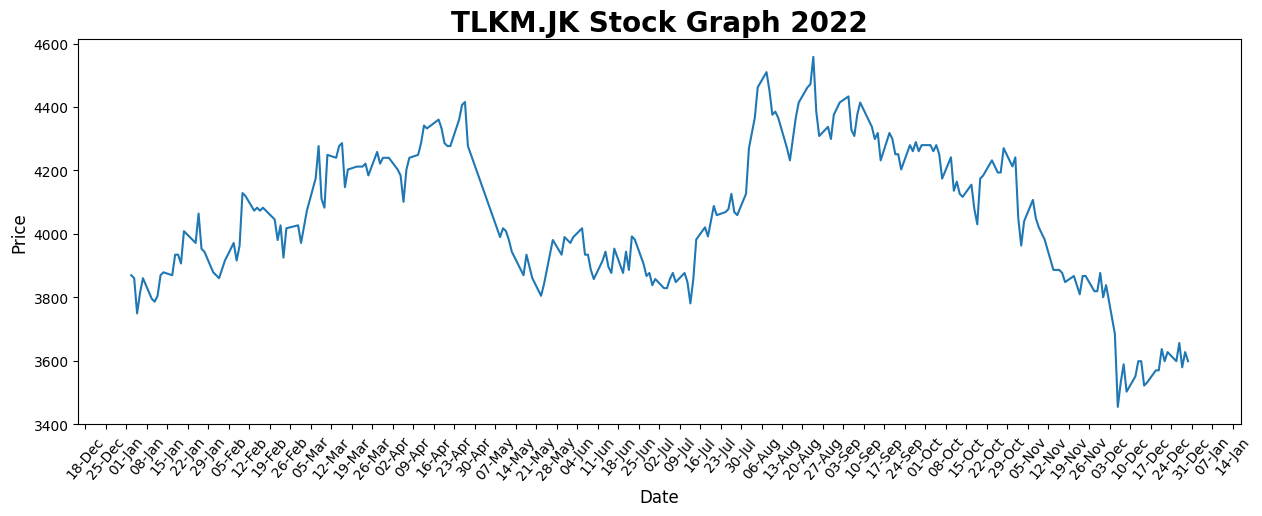

In [ ]:
#showing the data per day in  7 days interval
fig,ax = plt.subplots(1, figsize=(15,5))
ax.plot(hist['Close'])

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Set tick locator for 7 days
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Set date format

ax.set_title("TLKM.JK Stock Graph 2022", fontsize=20, fontweight='bold')
ax.set_ylabel("Price", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.xticks(rotation=50)

plt.show()

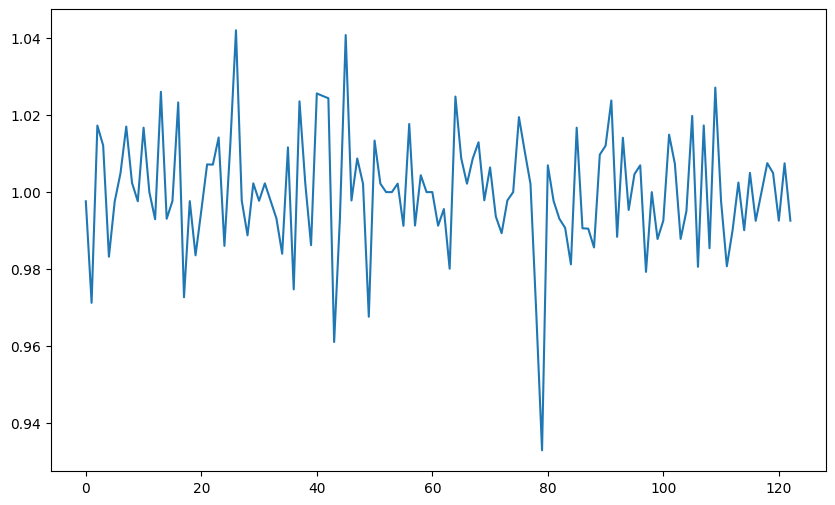

In [ ]:
# estimasi parameter metode empiris
hist['return'] = [hist.Close[i]/hist.Close[i-1] for i in range(1,len(hist))]+[0]

# calculates the daily returns of the stock by dividing each day's closing price by the previous day's closing price.
ret = np.array(hist['return'][0:int(len(hist)/2)])

#extract the first half of the returns data (to estimate parameters empirically)
fig,ax = plt.subplots(1,figsize=(10,6))
ax.plot(ret)
plt.show()

mean, std up 1.0127876492365004 0.009390280465609377
mean, std down 0.9894528357629759 0.011183448565581733
u,d,p= 1.0127876492365004 0.9894528357629759 0.45528455284552843
varoansi log saham($sigma^2t$)= 0.04089668910695379


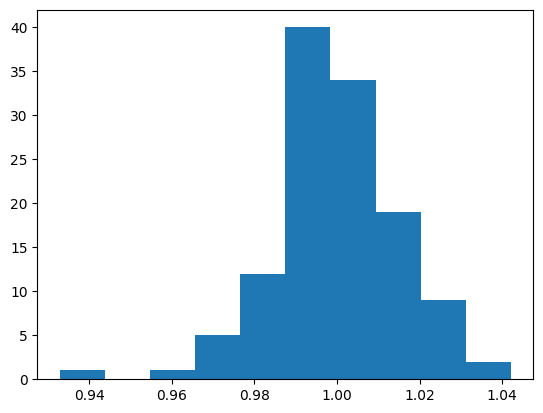

In [ ]:
#Setting the figure size
print('mean, std up', np.mean(ret[ret>1]), np.std(ret[ret>1]))
print('mean, std down',np.mean(ret[ret<=1]), np.std(ret[ret<=1]))
plt.hist(ret, bins=10)

up= np.mean(ret[ret>1]) #estimate the u empiris value (avg. return when the stock price goes up)
dwn = np.mean(ret[ret<=1]) #estimate the u empiris value (avg. return when the stock price goes down)
p_empi = len(ret[ret>1])/len(ret) #estimate the probablity of moving upward
avret = np.mean(ret) #the average return of stock
print('u,d,p=', up,dwn,p_empi)

# calculates the squared deviations from the average return
# sigm=(ret-avret)**2

# estimasi Model CRR sigma
logS= np.log(np.array([hist.Close[i] for i in range(0,int(len(hist)/2))]))
print('varoansi log saham($sigma^2t$)=', np.std(logS))
sig = np.sqrt(np.std(logS)/1)# volatilitas harga saham

In [ ]:
import math
# Estimasi nilai sigma dari log(S)
hist['logs'] = [np.log(k) for k in hist['Close']]
logs = np.array(hist['logs'])[0:int(len(hist)/2)+1]
varLogs=np.std(logs)**2 #\sigma^2t
sigEst= np.sqrt(varLogs/1)
print(len(hist['logs'][int(len(hist)/2)+1:-1]))

121


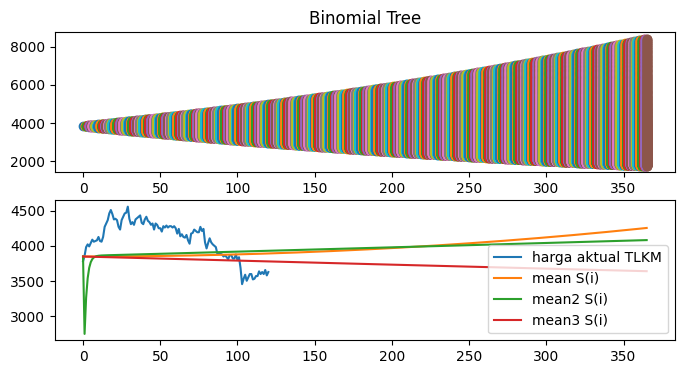

In [ ]:
# Binomial Tree Saham (Stock)
So = hist.Close[int(len(hist)/2)]
sig = sigEst
r = 0.055 # suku bunga bank Indonesia
N = 365 # harian dalam satu tahun
dt = 1/N
u=np.exp(sig*np.sqrt(dt))
d=1/u
p=(np.exp(-r*dt)-d)/(u-d)

fig,ax = plt.subplots(2,figsize=(8,4))
price = np.zeros((N+1,N+1), float)
mean_si = np.zeros((N+1), float)
mean2_si = np.zeros((N+1), float)
mean3_si = np.zeros((N+1), float)
mean_si[0] = So
mean2_si[0] = So
mean3_si[0] = So
price[0,N] = So
ax[0].scatter(0, price[0,N])
ax[1].plot(range(len(hist.Close[int(len(hist)/2)+1:-1])), hist.Close[int(len(hist)/2)+1:-1], label='harga aktual TLKM')
for i in range(1,N+1): # time step
  for j in reversed(range(i+1)): # jumlah kenaikan
    price[j,i] = So*u**(j)*d**(i-j)
  ax[0].scatter([i for k in range(len(price[0:i+1,i]))], price[0:i+1,i])
  mean_si[i] = np.mean(price[0:i+1,i])
  prob = np.array([math.comb(i+1, i+1-k)*p**(i+1-k)*(1-p)**k for k in range(i+1)])
  # print(prob.shape,price[0:i+1,i].shape )
  mean2_si[i] = np.sum(price[0:i+1,i]*prob)
  mean3_si[i] = So*u**(i*p)*d**(i-i*p)
    # print(price[j,i])
    # print(j)
ax[0].set_title("Binomial Tree")
ax[1].plot(mean_si, label='mean S(i)')
ax[1].plot(mean2_si, label='mean2 S(i)')
ax[1].plot(mean3_si, label='mean3 S(i)')
plt.legend()

In [ ]:
a = np.array([i for i in range(3)])
b = np.array([i for i in reversed(range(3))])
a*b
print(a.shape, b.shape)

(3,) (3,)


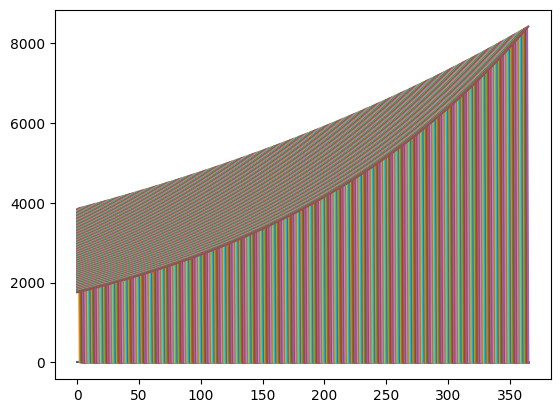

In [ ]:
plt.plot(price)
plt.show()

## Monte Carlo Simulation in Financial Stock Model

### Binomial Model for Stock Price
Suppose that discrete time step for a time interval $[0,T]$ is $\{t_0=0, t_1, t_2, \cdots, t_N=T\}$, where $|t_{i+1}-t_{i}|$ are equidistance for all $i$, that is $\Delta t = \frac{T}{N}$.
Assume that for every time step, stock price can only go up with probability $p$ or down with probability $1-p$. And it has fixed factors for going up or down, respectively are $u$ and $d$.

If at $t_0$, the stock price is $S_0$, then at $t_N$ the stock price will be following the binomial distribution, $x~Binom(x;N,p)$ with $x$ here is the number of $S_0$ going up during $\{t_0=0, t_1, t_2, \cdots, t_N=T\}$. And stock price $S(t_N)$ is written as:

$S(t_N)=S_N = S_0 u^x d^{N-x}, $ with probability $P(X=x) = \binom{N}{x} p^x (1-p)^{N-x}$

#### WHat are the parameters $p,u,$ and $d$?
$p = \frac{e^{-r\Delta t }-d}{u-d} $

$u = e^{\sigma \sqrt{\Delta t}}$

$d = e^{-\sigma \sqrt{\Delta t}}$

where $r$ is risk free interest rate, and $\sigma$ is the risk of stock return.

### Stock Price Model at a given time step (Bernouli)
After $\Delta t$, $S(t)$ assume to change following Brown Motion

In [ ]:
# MOnte carlo simulation per time steps (Bernouli event for every time step)
so=10
T=1
N=10
dt=T/N
r = 0.0575 # suku bunagn bank Indonesia
sig = 0.15
u=np.exp(sig*np.sqrt(dt))
d=1/u
p=(np.exp(-r*dt)-d)/(u-d)
M=20
smt = [[]]
for k in range(M):
  s=so
  sv=[s]
  for i in range(N):
    x=np.random.binomial(N,p)
    s=s*u**(x)*d**(1-x)
    sv=sv+[s]
  smt =smt+[sv]

smt=[k for k in smt[1:][:]]

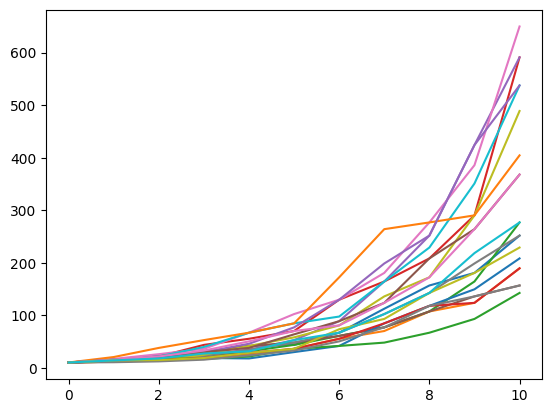

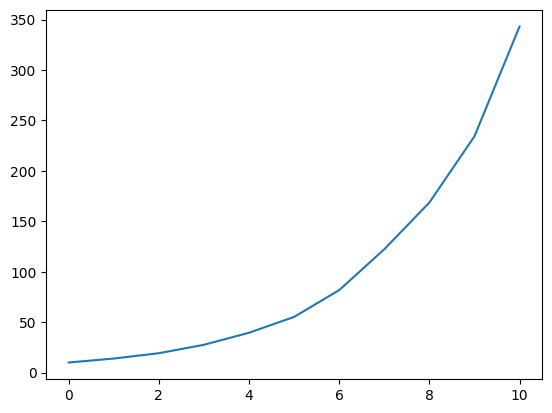

In [ ]:
[plt.plot(k) for k in smt]
plt.show()
## Average path of stock prices
smean=np.mean(np.array(smt), axis=0)
plt.plot(smean)

In [ ]:
# Binomial Tree
so=10
T=1
N=10
dt=T/N
r = 0.06
sig = 0.15
u=np.exp(sig*np.sqrt(dt))
d=1/u
p=(np.exp(-r*dt)-d)/(u-d)
M=20
smt = [[]]
for k in range(M):
  s=so
  sv=[s]
  for i in range(N):
    x=np.random.binomial(N,p)
    s=s*u**(x)*d**(1-x)
    sv=sv+[s]
  smt =smt+[sv]

smt=[k for k in smt[1:][:]]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


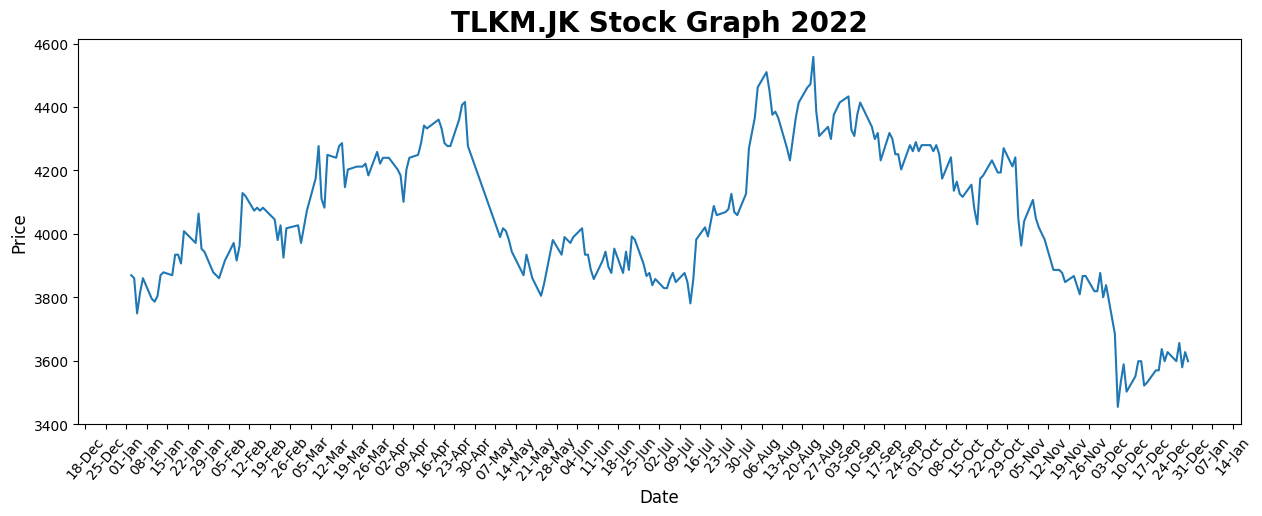

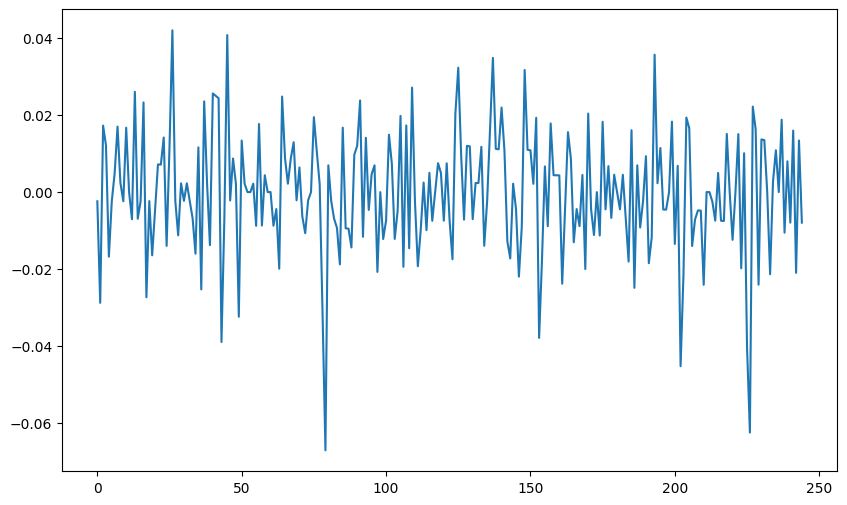

u, d, p = 0.012807755579277276 -0.011281159934457358 0.46122448979591835


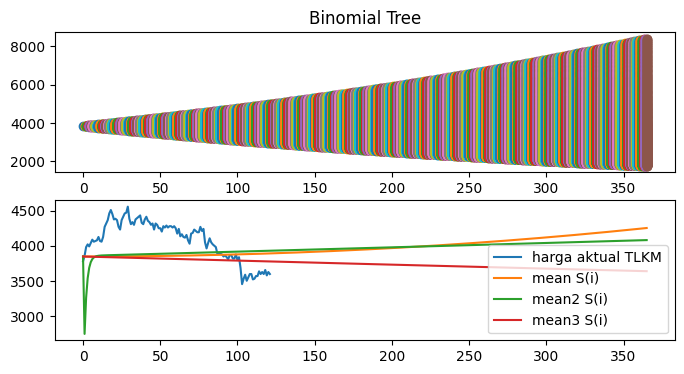

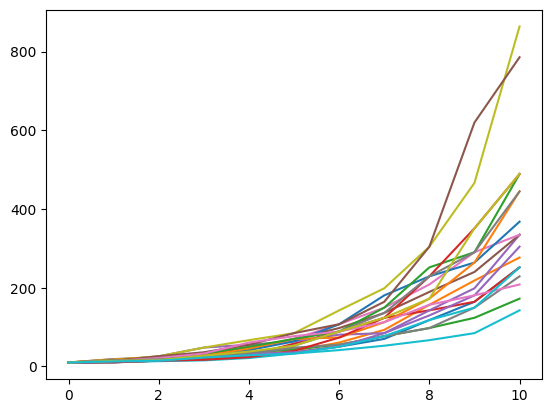

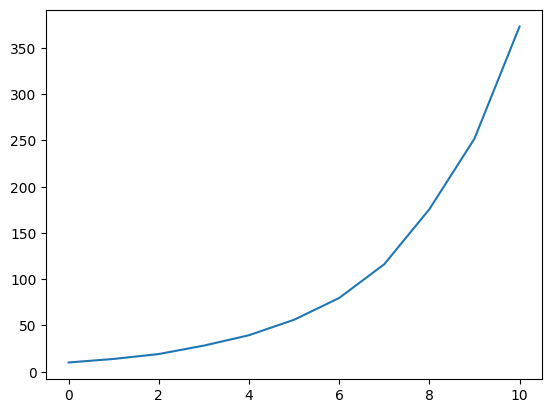

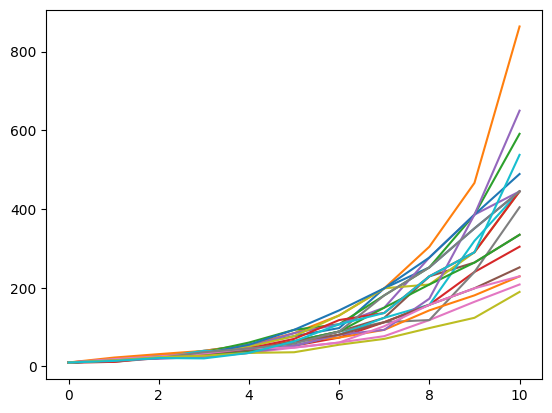

In [ ]:
#@title Kode 0

import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import math

# Install required packages
# !pip install yfinance
# !pip install pandas-datareader

# Import the data
ytlkm = yf.Ticker("TLKM.JK")
hist = ytlkm.history(start="2022-01-01", end="2022-12-31")

# Plotting the data with 7-day interval
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.plot(hist['Close'])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.set_title("TLKM.JK Stock Graph 2022", fontsize=20, fontweight='bold')
ax.set_ylabel("Price", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
plt.xticks(rotation=50)
plt.show()

# Calculate daily returns
hist['return'] = hist['Close'].pct_change()
ret = hist['return'].dropna().values

# Plot the daily returns
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(ret)
plt.show()

# Estimate empirical parameters
up = np.mean(ret[ret > 0])
down = np.mean(ret[ret <= 0])
p_empi = len(ret[ret > 0]) / len(ret)
avret = np.mean(ret)

print('u, d, p =', up, down, p_empi)

# Estimate sigma from log returns
logS = np.log(hist['Close'].values[:len(hist) // 2])
varLogs = np.std(logS) ** 2
sigEst = np.sqrt(varLogs)

# Binomial Tree Saham (Stock)
So = hist['Close'].values[len(hist) // 2]
sig = sigEst
r = 0.055  # suku bunga bank Indonesia
N = 365  # harian dalam satu tahun
dt = 1 / N
u = np.exp(sig * np.sqrt(dt))
d = 1 / u
p = (np.exp(-r * dt) - d) / (u - d)

fig, ax = plt.subplots(2, figsize=(8, 4))
price = np.zeros((N + 1, N + 1), float)
mean_si = np.zeros((N + 1), float)
mean2_si = np.zeros((N + 1), float)
mean3_si = np.zeros((N + 1), float)
mean_si[0] = So
mean2_si[0] = So
mean3_si[0] = So
price[0, N] = So
ax[0].scatter(0, price[0, N])
ax[1].plot(range(len(hist['Close'][len(hist) // 2 + 1:])), hist['Close'][len(hist) // 2 + 1:], label='harga aktual TLKM')

for i in range(1, N + 1):  # time step
    for j in reversed(range(i + 1)):  # jumlah kenaikan
        price[j, i] = So * u ** (j) * d ** (i - j)
    ax[0].scatter([i for k in range(len(price[0:i + 1, i]))], price[0:i + 1, i])
    mean_si[i] = np.mean(price[0:i + 1, i])
    prob = np.array([math.comb(i + 1, i + 1 - k) * p ** (i + 1 - k) * (1 - p) ** k for k in range(i + 1)])
    mean2_si[i] = np.sum(price[0:i + 1, i] * prob)
    mean3_si[i] = So * u ** (i * p) * d ** (i - i * p)

ax[0].set_title("Binomial Tree")
ax[1].plot(mean_si, label='mean S(i)')
ax[1].plot(mean2_si, label='mean2 S(i)')
ax[1].plot(mean3_si, label='mean3 S(i)')
plt.legend()
plt.show()

# Monte Carlo simulation per time steps (Bernoulli event for every time step)
so = 10
T = 1
N = 10
dt = T / N
r = 0.0575  # suku bunga bank Indonesia
sig = 0.15
u = np.exp(sig * np.sqrt(dt))
d = 1 / u
p = (np.exp(-r * dt) - d) / (u - d)
M = 20
smt = [[]]

for k in range(M):
    s = so
    sv = [s]
    for i in range(N):
        x = np.random.binomial(N, p)
        s = s * u ** (x) * d ** (1 - x)
        sv = sv + [s]
    smt = smt + [sv]

smt = smt[1:]

[plt.plot(k) for k in smt]
plt.show()

# Average path of stock prices
smean = np.mean(np.array(smt), axis=0)
plt.plot(smean)
plt.show()

# Binomial Tree
so = 10
T = 1
N = 10
dt = T / N
r = 0.06
sig = 0.15
u = np.exp(sig * np.sqrt(dt))
d = 1 / u
p = (np.exp(-r * dt) - d) / (u - d)
M = 20
smt = [[]]

for k in range(M):
    s = so
    sv = [s]
    for i in range(N):
        x = np.random.binomial(N, p)
        s = s * u ** (x) * d ** (1 - x)
        sv = sv + [s]
    smt = smt + [sv]

smt = smt[1:]

[plt.plot(k) for k in smt]
plt.show()

[*********************100%***********************]  1 of 1 completed


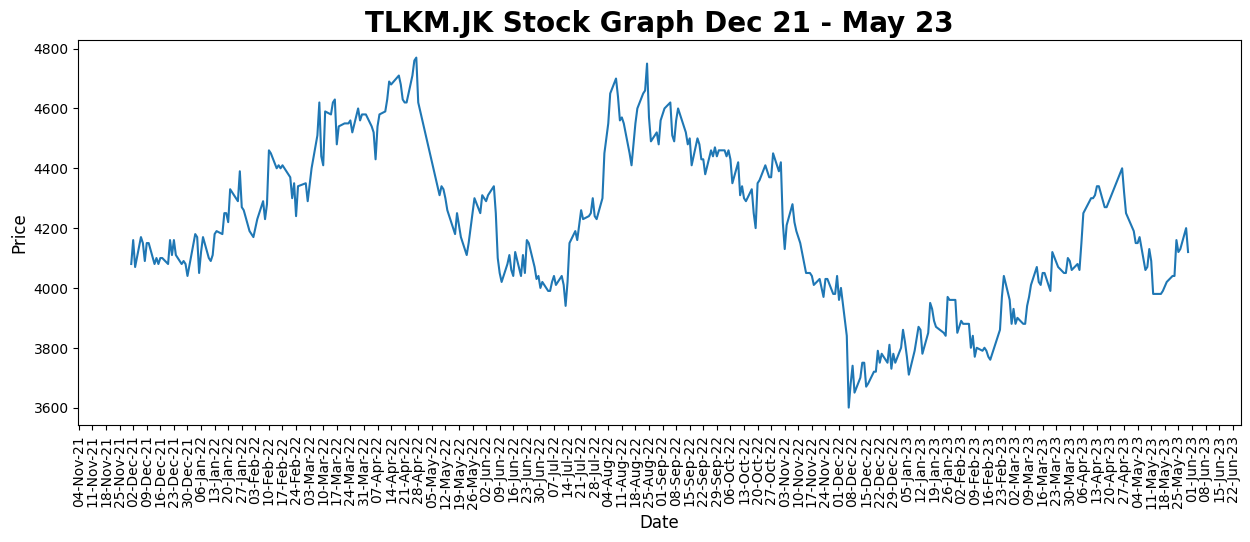

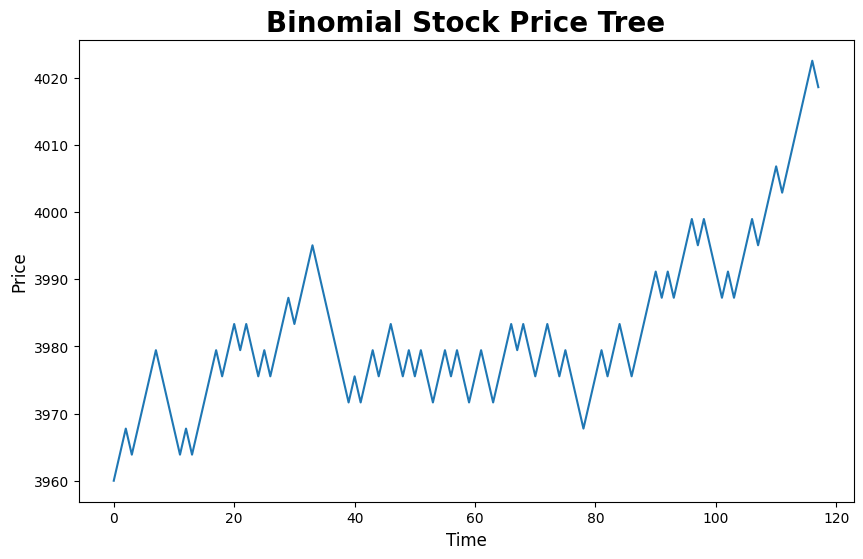

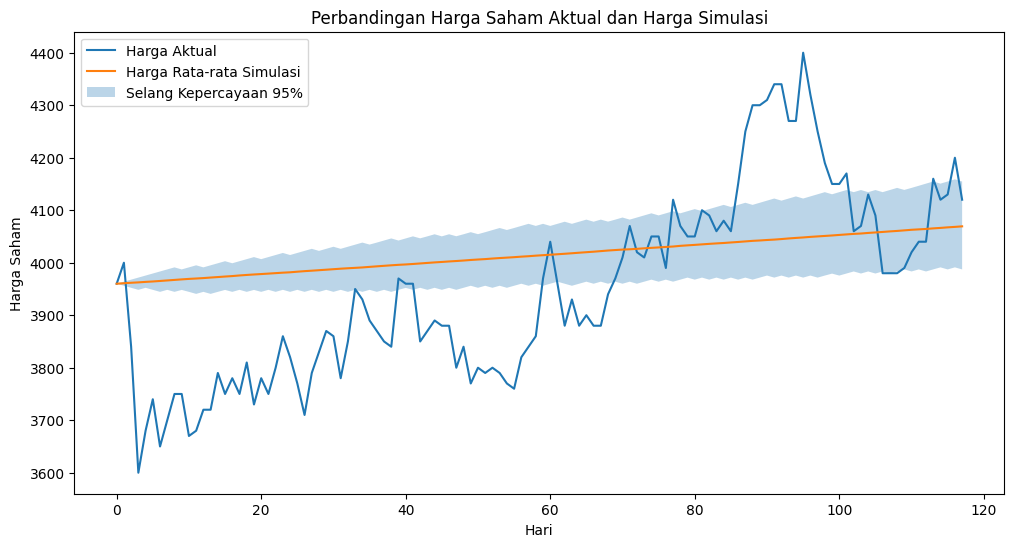

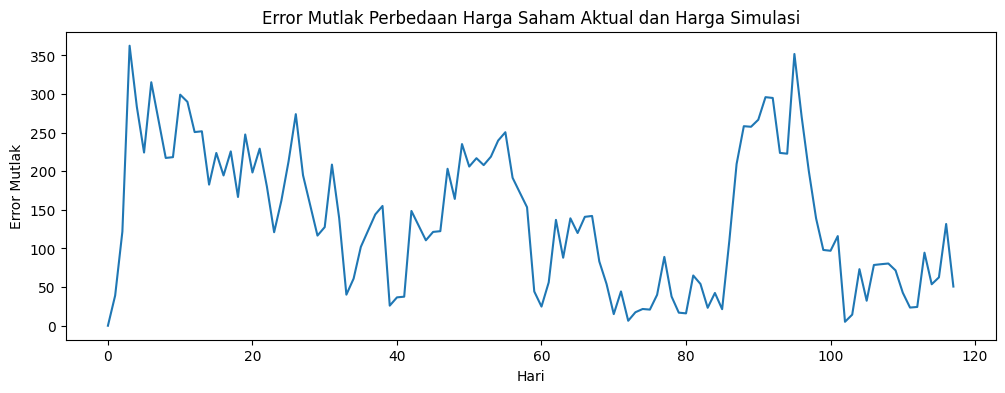

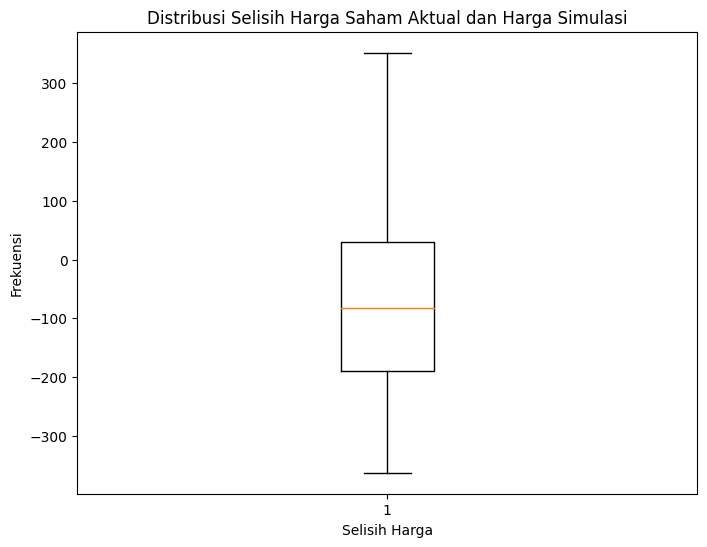

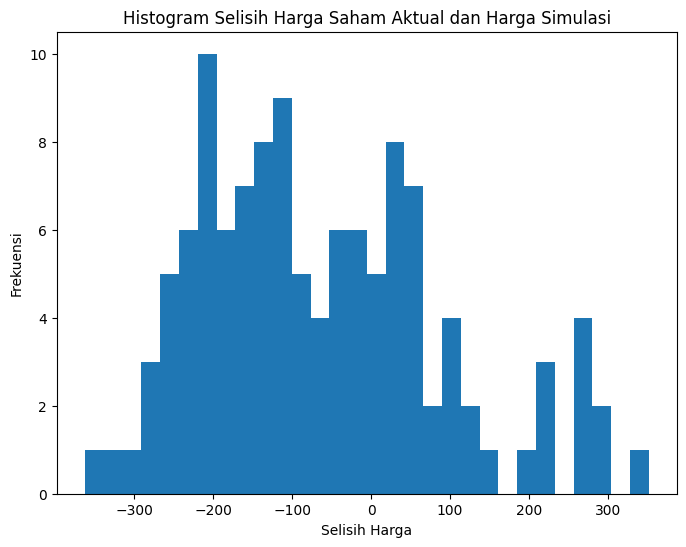

Rata-rata Error (Metode Empiris): 139.1049977678387
Rata-rata Error (Metode CRR): 139.1049977678387


In [ ]:
#@title Kode 1
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr

# Menggunakan library yfinance untuk mendapatkan data historis saham
yf.pdr_override()

# Memilih saham yang akan dianalisis (TLKM.JK adalah saham Telkom Indonesia di Bursa Efek Indonesia)
symbol = "TLKM.JK"
start_date = "2021-12-01"
end_date = "2023-05-31"

# Mendapatkan data historis saham menggunakan yfinance
df = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)

# Menampilkan grafik harga saham per hari dengan interval 7 hari
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.plot(df['Close'])

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))

ax.set_title("TLKM.JK Stock Graph Dec 21 - May 23", fontsize=20, fontweight='bold')
ax.set_ylabel("Price", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.xticks(rotation=90)

plt.show()

# Estimasi parameter metode empiris
returns = df['Close'].pct_change().dropna()

up = np.mean(returns[returns > 0])
down = np.mean(returns[returns <= 0])
p_empirical = len(returns[returns > 0]) / len(returns)
r = 0.0575  # Suku bunga Bank Indonesia

# Estimasi nilai sigma dari log(S)
log_returns = np.log(1 + returns)
sigma = np.std(log_returns) / np.sqrt(1)

# Estimasi pohon Binomial harga saham
N = len(df['Close'].loc['2022-12-01':'2023-05-31'])
S0 = df['Close'].iloc[-N]
dt = 1 / len(df['Close'].loc['2021-12-01':'2022-11-30'])

u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p_binomial = (np.exp(r * dt) - d) / (u - d)

prices = [S0]

for i in range(N-1):
    prev_price = prices[-1]
    if np.random.uniform() < p_binomial:
        price = prev_price * u
    else:
        price = prev_price * d
    prices.append(price)

# Visualisasi pohon Binomial harga saham
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(prices)
ax.set_title("Binomial Stock Price Tree", fontsize=20, fontweight='bold')
ax.set_ylabel("Price", fontsize=12)
ax.set_xlabel("Time", fontsize=12)
plt.show()

# Simulasi Monte Carlo
n_simulations = 1000
simulation_results = []

for _ in range(n_simulations):
    prices = [S0]

    for i in range(N-1):
        prev_price = prices[-1]
        if np.random.uniform() < p_binomial:
            price = prev_price * u
        else:
            price = prev_price * d
        prices.append(price)

    simulation_results.append(prices)

# Visualisasi hasil simulasi Monte Carlo
mean_prices = np.mean(simulation_results, axis=0)
lower_bound = np.percentile(simulation_results, 2.5, axis=0)
upper_bound = np.percentile(simulation_results, 97.5, axis=0)

# Perbandingan harga saham aktual dan harga simulasi
actual_prices = df['Close'].values[-N:]

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Harga Aktual")
plt.plot(mean_prices, label="Harga Rata-rata Simulasi")
plt.fill_between(range(N), lower_bound, upper_bound, alpha=0.3, label="Selang Kepercayaan 95%")
plt.xlabel("Hari")
plt.ylabel("Harga Saham")
plt.title("Perbandingan Harga Saham Aktual dan Harga Simulasi")
plt.legend()
plt.show()

# Error mutlak perbedaan harga
price_diff = actual_prices - mean_prices

plt.figure(figsize=(12, 4))
plt.plot(np.abs(price_diff))
plt.xlabel("Hari")
plt.ylabel("Error Mutlak")
plt.title("Error Mutlak Perbedaan Harga Saham Aktual dan Harga Simulasi")
plt.show()

# Distribusi selisih harga
plt.figure(figsize=(8, 6))
plt.boxplot(price_diff)
plt.xlabel("Selisih Harga")
plt.ylabel("Frekuensi")
plt.title("Distribusi Selisih Harga Saham Aktual dan Harga Simulasi")
plt.show()

# Histogram selisih harga
plt.figure(figsize=(8, 6))
plt.hist(price_diff, bins=30)
plt.xlabel("Selisih Harga")
plt.ylabel("Frekuensi")
plt.title("Histogram Selisih Harga Saham Aktual dan Harga Simulasi")
plt.show()

# Bandingkan hasil simulasi dari dua cara berbeda
simulation_results_crr = np.array(simulation_results)[:, :N]
error_empirical = np.abs(actual_prices - mean_prices).mean()
error_crr = np.abs(actual_prices - simulation_results_crr.mean(axis=0)).mean()

print("Rata-rata Error (Metode Empiris):", error_empirical)
print("Rata-rata Error (Metode CRR):", error_crr)

[*********************100%***********************]  1 of 1 completed


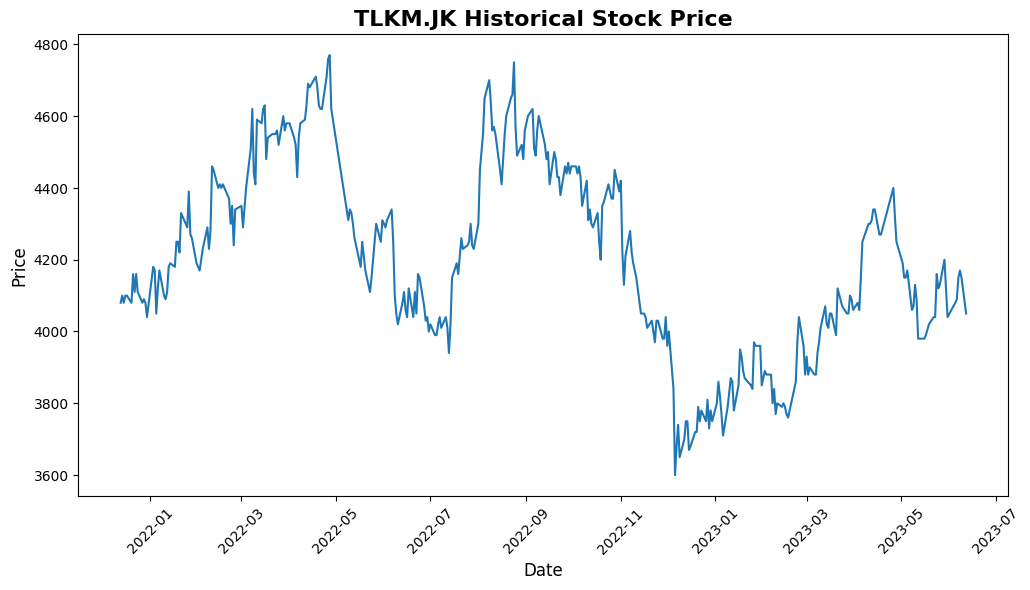

u, d, p = 1.0009889643349599 0.9990120127491946 0.611631342912188


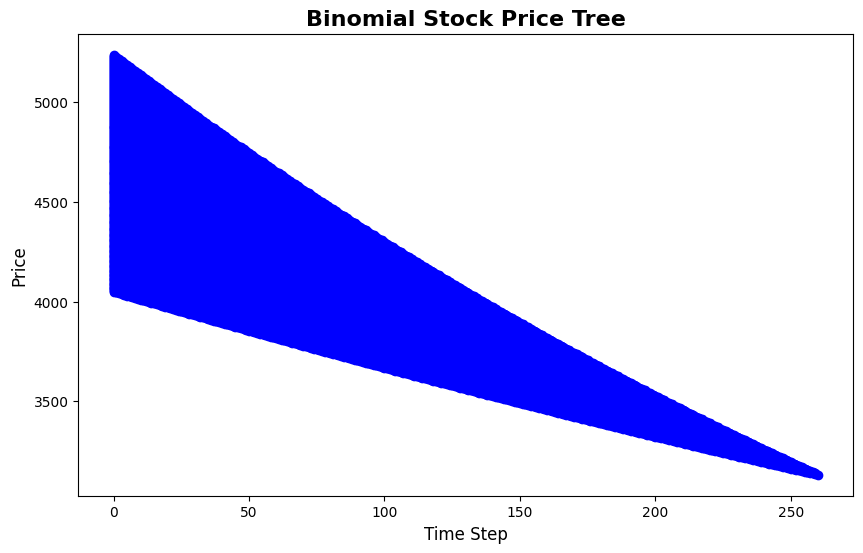

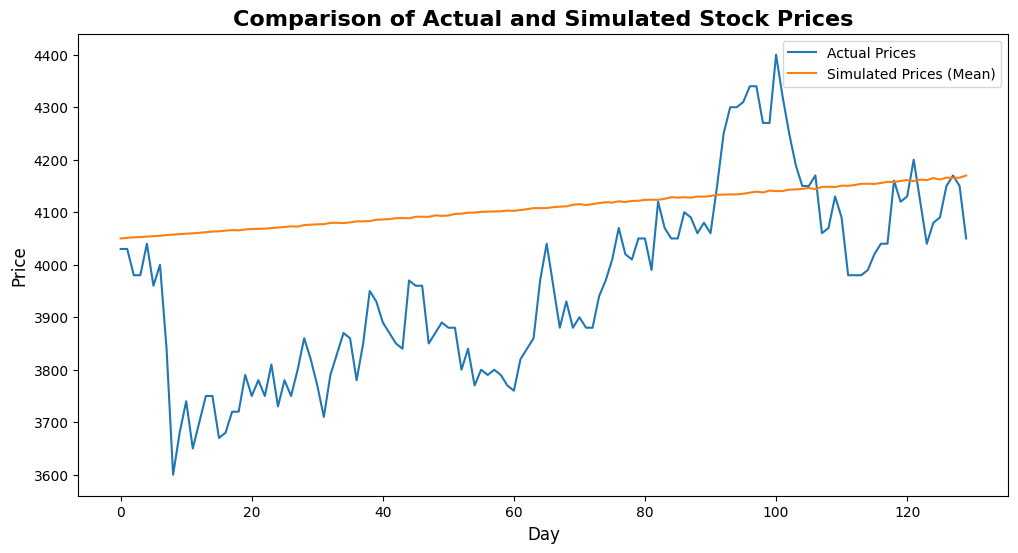

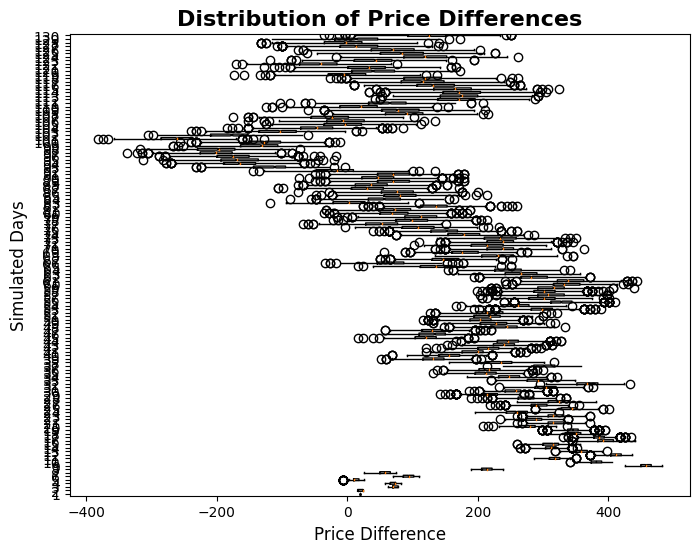

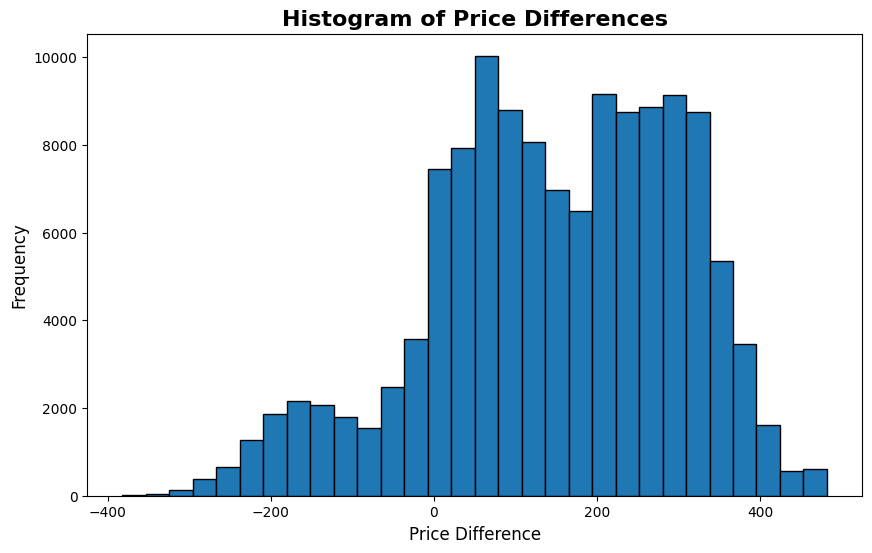

Mean Squared Error (MSE): 45343.34237560401
Mean Absolute Error (MAE): 180.37992898738207
Mean Absolute Percentage Error (MAPE): 4.659439583017906


In [ ]:
#@title Kode 2
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import math

# Import the data
emiten = "TLKM.JK"  # Ganti dengan emiten saham/currency yang Anda pilih
historical_months = 18  # Jumlah bulan historis yang akan diambil
start_date = pd.Timestamp.now() - pd.DateOffset(months=historical_months)
end_date = pd.Timestamp.now()

# Menggunakan yfinance untuk mendapatkan data harga historis
data = yf.download(emiten, start=start_date, end=end_date)
hist = data['Close'].dropna()

# Plot harga saham historis
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(hist)
ax.set_title(f"{emiten} Historical Stock Price", fontsize=16, fontweight='bold')
ax.set_ylabel("Price", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Menghitung suku bunga rata-rata Bank Indonesia dalam 1 tahun
r = 0.0575  # Misalnya, menggunakan suku bunga 5.75% (0.0575)

# Menghitung sigma dari data 12 bulan pertama
hist_12months = hist[:252]  # 1 tahun = 252 hari
log_returns = np.log(hist_12months / hist_12months.shift(1))
sigma = np.std(log_returns)

# Estimasi nilai u, d, dan p
N = 260  # Jumlah hari dalam satu tahun
dt = 1 / N
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)

print('u, d, p =', u, d, p)

# Membuat pohon Binomial harga saham
price_tree = np.zeros((N + 1, N + 1), float)
price_tree[0, 0] = hist.iloc[-1]  # Harga saham saat ini sebagai harga awal

for i in range(1, N + 1):  # time step
    for j in range(i + 1):  # jumlah kenaikan
        price_tree[j, i] = price_tree[0, 0] * u ** (i - j) * d ** j

# Plot pohon Binomial harga saham
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(N + 1):
    ax.plot(range(i + 1), price_tree[:i + 1, i], 'bo-')
ax.set_title("Binomial Stock Price Tree", fontsize=16, fontweight='bold')
ax.set_ylabel("Price", fontsize=12)
ax.set_xlabel("Time Step", fontsize=12)
plt.show()

# Simulasi Monte Carlo untuk mendapatkan barisan harga rata-rata saham
M = 1000  # Jumlah simulasi Monte Carlo
days_simulation = 130  # 6 bulan dari tanggal terakhir data historis
simulated_prices = np.zeros((M, days_simulation))

for m in range(M):
    simulated_prices[m, 0] = price_tree[0, 0]  # Harga awal sama dengan harga saham saat ini
    for i in range(1, days_simulation):
        rand = np.random.uniform(size=i)
        up_prob = np.sum(rand < p)
        down_prob = i - up_prob
        simulated_prices[m, i] = (
            simulated_prices[m, 0] * u ** up_prob * d ** down_prob
        )

# Menghitung harga aktual selama periode simulasi
actual_prices = hist[-days_simulation:].values

# Plot perbandingan harga saham simulasi dan aktual
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(actual_prices, label='Actual Prices')
ax.plot(np.mean(simulated_prices, axis=0), label='Simulated Prices (Mean)')
ax.set_title("Comparison of Actual and Simulated Stock Prices", fontsize=16, fontweight='bold')
ax.set_ylabel("Price", fontsize=12)
ax.set_xlabel("Day", fontsize=12)
ax.legend()
plt.show()

# Menghitung selisih harga simulasi dengan harga aktual
price_diff = simulated_prices - actual_prices.reshape(1, -1)

# Menghitung error mutlak perbedaan harga
abs_error = np.abs(price_diff)

# Plot distribusi selisih harga dalam boxplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(price_diff, notch=True, vert=False)
ax.set_title("Distribution of Price Differences", fontsize=16, fontweight='bold')
ax.set_ylabel("Simulated Days", fontsize=12)
ax.set_xlabel("Price Difference", fontsize=12)
plt.show()

# Plot distribusi selisih harga dalam histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(price_diff.flatten(), bins=30, edgecolor='black')
ax.set_title("Histogram of Price Differences", fontsize=16, fontweight='bold')
ax.set_xlabel("Price Difference", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
plt.show()

# Menghitung rata-rata error (MSE, MAE, MAPE)
mse = np.mean(np.square(price_diff))
mae = np.mean(abs_error)
mape = np.mean(abs_error / actual_prices.reshape(1, -1)) * 100

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)


In [ ]:
# #@title Kode 3
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # 1. Mendapatkan data harga saham historis
# # Anda perlu mengganti "TICKER" dengan simbol ticker saham yang Anda pilih
# data = pd.read_csv("historical_data.csv")  # Gantikan dengan metode yang sesuai untuk mendapatkan data historis

# # 2. Menggunakan rata-rata suku bunga Bank Indonesia dalam 1 tahun sebagai nilai r
# r = 0.05  # Gantikan dengan nilai rata-rata suku bunga yang sesuai

# # 3. Menggunakan data 12 bulan pertama untuk menentukan nilai S0 dan sigma
# data_12_months = data[:12*30]  # Menggunakan 12 bulan pertama (asumsi 1 bulan = 30 hari)
# S0 = data_12_months["Close"].iloc[-1]  # Harga penutupan terakhir
# sigma = data_12_months["Close"].pct_change().std()  # Volatilitas harga

# # 4. Menghitung/estimasi nilai u, d, dan p
# # Berikut adalah contoh penggunaan metode historis untuk mengestimasi parameter
# returns = data["Close"].pct_change()
# u = np.exp(sigma * np.sqrt(1))  # Pertumbuhan naik (upward)
# d = np.exp(-sigma * np.sqrt(1))  # Pertumbuhan turun (downward)
# p = (1 + r - d) / (u - d)  # Probabilitas pertumbuhan naik

# # 5. Membuat pohon Binomial harga saham
# N = 130  # Jumlah hari selama 6 bulan berikutnya (asumsi 1 bulan = 30 hari)
# price_tree = np.zeros((N+1, N+1))
# price_tree[0, 0] = S0

# for i in range(1, N+1):
#     price_tree[0, i] = price_tree[0, i-1] * u
#     for j in range(1, i+1):
#         price_tree[j, i] = price_tree[j-1, i-1] * d

# # 6. Simulasi Monte Carlo untuk mendapatkan harga rata-rata saham
# M = 1000  # Jumlah iterasi simulasi
# simulation_results = []

# for _ in range(M):
#     simulated_prices = [S0]
#     for i in range(1, N+1):
#         random_nums = np.random.binomial(1, p, size=i)
#         price = simulated_prices[-1]
#         for rand in random_nums:
#             if rand == 1:
#                 price *= u
#             else:
#                 price *= d
#         simulated_prices.append(price)
#     simulation_results.append(simulated_prices)

# # Menghitung harga rata-rata dan selang kepercayaan 95%
# mean_prices = np.mean(simulation_results, axis=0)
# lower_bound = np.percentile(simulation_results, 2.5, axis=0)
# upper_bound = np.percentile(simulation_results, 97.5, axis=0)

# # 7. Membandingkan dengan harga saham aktual
# actual_prices = data["Close"].values[-N:]
# price_diff = actual_prices - mean_prices

# # 8. Plot perbandingan harga saham
# plt.figure(figsize=(12, 6))
# plt.plot(actual_prices, label="Harga Aktual")
# plt.plot(mean_prices, label="Harga Rata-rata Simulasi")
# plt.fill_between(range(N+1), lower_bound, upper_bound, alpha=0.3, label="Selang Kepercayaan 95%")
# plt.xlabel("Hari")
# plt.ylabel("Harga Saham")
# plt.title("Perbandingan Harga Saham Aktual dan Harga Simulasi")
# plt.legend()
# plt.show()

# # Plot error mutlak perbedaan harga
# plt.figure(figsize=(12, 4))
# plt.plot(np.abs(price_diff))
# plt.xlabel("Hari")
# plt.ylabel("Error Mutlak")
# plt.title("Error Mutlak Perbedaan Harga Saham Aktual dan Harga Simulasi")
# plt.show()

# # Plot distribusi selisih harga
# plt.figure(figsize=(8, 6))
# plt.boxplot(price_diff)
# plt.xlabel("Selisih Harga")
# plt.ylabel("Frekuensi")
# plt.title("Distribusi Selisih Harga Saham Aktual dan Harga Simulasi")
# plt.show()

# # Histogram selisih harga
# plt.figure(figsize=(8, 6))
# plt.hist(price_diff, bins=30)
# plt.xlabel("Selisih Harga")
# plt.ylabel("Frekuensi")
# plt.title("Histogram Selisih Harga Saham Aktual dan Harga Simulasi")
# plt.show()

# # 9. Bandingkan hasil simulasi dari dua cara berbeda
# # Hitung nilai rata-rata error
# actual_prices = data["Close"].values[-N:]
# simulation_results_crr = np.array(simulation_results)[:, -N:]
# error_empirical = np.abs(actual_prices - mean_prices[-N:]).mean()
# error_crr = np.abs(actual_prices - simulation_results_crr.mean(axis=0)).mean()

# print("Rata-rata Error (Metode Empiris):", error_empirical)
# print("Rata-rata Error (Metode CRR):", error_crr)

# # 10. Tuliskan laporan dengan menggunakan hasil-hasil tersebut
# # Buat laporan yang mencakup semua langkah di atas, analisis hasil, dan kesimpulan


[*********************100%***********************]  1 of 1 completed
              Open    High     Low   Close    Adj Close     Volume
Date                                                              
2021-12-13  4150.0  4150.0  4080.0  4080.0  3777.075439   65533000
2021-12-14  4120.0  4120.0  4070.0  4100.0  3795.590576   75736900
2021-12-15  4060.0  4140.0  4060.0  4080.0  3777.075439   84424500
2021-12-16  4110.0  4150.0  4060.0  4100.0  3795.590576   98164300
2021-12-17  4010.0  4100.0  4010.0  4100.0  3795.590576  149615800
...            ...     ...     ...     ...          ...        ...
2023-06-06  4090.0  4130.0  4050.0  4090.0  3924.824463   95792700
2023-06-07  4100.0  4150.0  4080.0  4150.0  3982.401123  127707400
2023-06-08  4160.0  4180.0  4120.0  4170.0  4001.593506   78989700
2023-06-09  4170.0  4170.0  4140.0  4150.0  3982.401123   83014700
2023-06-12  4040.0  4050.0  4010.0  4050.0  4050.000000   94687300

[363 rows x 6 columns]


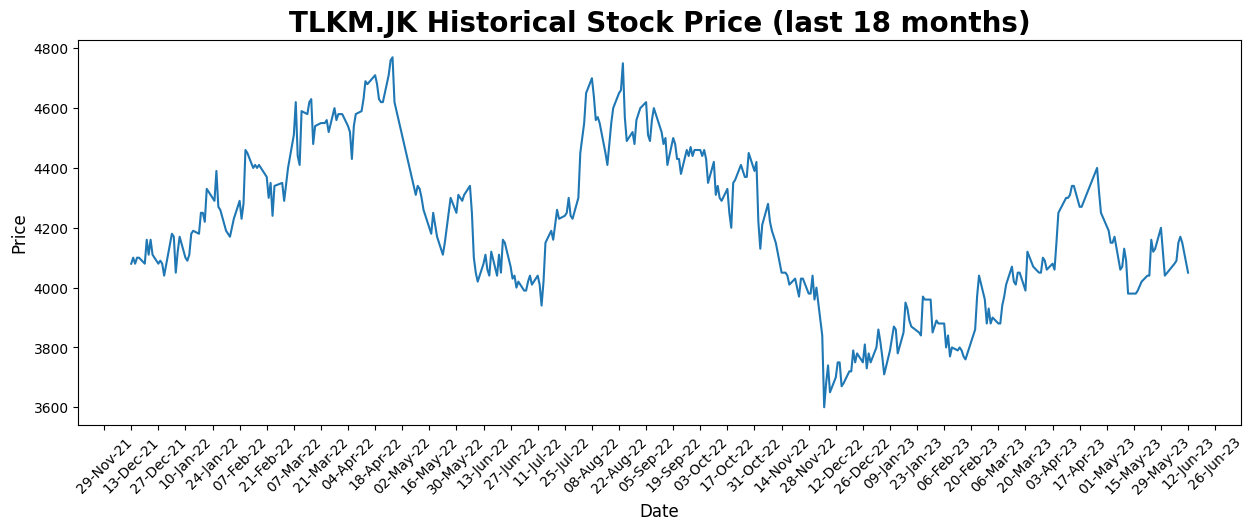

In [ ]:
#@title 1. Pilih satu emiten saham/currency dan dapatkan harga historinya untuk 18 bulan.

import math
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr

# Menggunakan library yfinance untuk mendapatkan data historis saham
yf.pdr_override()

# Memilih saham yang akan dianalisis (TLKM.JK adalah saham Telkom Indonesia di Bursa Efek Indonesia)
emiten = "TLKM.JK"  # Ganti dengan emiten saham/currency yang Anda pilih
historical_months = 18  # Jumlah bulan historis yang akan diambil
start_date = pd.Timestamp.now() - pd.DateOffset(months=historical_months)
end_date = pd.Timestamp.now()

# Mendapatkan data historis saham menggunakan yfinance
data = pdr.get_data_yahoo(emiten, start=start_date, end=end_date)
hist = data['Close'].dropna()

print(data)

# Menampilkan grafik harga saham per hari dengan interval 7 hari
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.plot(hist)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))

ax.set_title("TLKM.JK Historical Stock Price (last 18 months)", fontsize=20, fontweight='bold')
ax.set_ylabel("Price", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.xticks(rotation=45)

plt.show()

In [ ]:
#@title 2. Gunakan rata-rata suku bunga Bank Indonesia dalam 1 tahun sebagai nilai $r$.

r = np.mean([3.50, 3.50, 3.50, 3.75, 4.25, 4.75, 5.25, 5.50, 5.75, 5.75, 5.75, 5.75])/100 # Data Mei 2022 sampai April 2023
print("r =", r, "({}%)".format(r*100))

# Referensi:
# 1. https://www.bi.go.id/id/publikasi/ruang-media/news-release/Pages/sp_251323.aspx#:~:text=Rapat%20Dewan%20Gubernur%20(RDG)%20Bank,bps%20menjadi%206%2C50%25.
# 2. https://www.bps.go.id/indicator/13/379/1/bi-rate.html

r = 0.0475 (4.75%)


In [ ]:
#@title 3. Gunakan data 12 bulan pertama untuk menentukan nilai $\sigma, S_0$.

cutoffDate = start_date + pd.DateOffset(months=12)
data_12_months = data[data.index <= cutoffDate]  # Menggunakan 12 bulan pertama (asumsi 1 bulan = 20 hari kerja)
S0 = data_12_months["Close"].iloc[-1]  # Harga penutupan terakhir

data_12_months['logs'] = np.log(data_12_months['Close'])
# logs = data_12_months['logs'][0:int(len(data_12_months)/2)+1]
varLogs = np.std(data_12_months['logs'])**2  # \sigma^2t
sigma = np.sqrt(varLogs)  # Volatilitas harga

print(data_12_months)
print("S0 =", S0)
print("sigma =", sigma)
# print("days =", len(data_12_months['logs']))

              Open    High     Low   Close    Adj Close     Volume      logs
Date                                                                        
2021-12-13  4150.0  4150.0  4080.0  4080.0  3777.075439   65533000  8.313852
2021-12-14  4120.0  4120.0  4070.0  4100.0  3795.590576   75736900  8.318742
2021-12-15  4060.0  4140.0  4060.0  4080.0  3777.075439   84424500  8.313852
2021-12-16  4110.0  4150.0  4060.0  4100.0  3795.590576   98164300  8.318742
2021-12-17  4010.0  4100.0  4010.0  4100.0  3795.590576  149615800  8.318742
...            ...     ...     ...     ...          ...        ...       ...
2022-12-07  3600.0  3700.0  3570.0  3680.0  3531.382324  278572200  8.210668
2022-12-08  3700.0  3780.0  3620.0  3740.0  3588.959229  245646400  8.226841
2022-12-09  3680.0  3720.0  3630.0  3650.0  3502.593750  164606100  8.202482
2022-12-12  3670.0  3710.0  3640.0  3700.0  3550.574707  170545000  8.216088
2022-12-13  3690.0  3790.0  3680.0  3750.0  3598.555420  231127000  8.229511

<ipython-input-125-d12cdbfad892>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_12_months['logs'] = np.log(data_12_months['Close'])


In [ ]:
#@title 4. Hitung/estimasi nilai $u$, $d$, dan $p$ sesuai deskripsi pada bagian 'Estimasi Parameter'

# Model CRR (Cox, Ross & Rubeinstein)
N = len(data_12_months)
dt = 1 / N
u_crr = np.exp(sigma * np.sqrt(dt))  # Pertumbuhan naik (upward)
d_crr = 1 / u  # Pertumbuhan turun (downward)
p_crr = (np.exp(r * dt) - d) / (u - d)  # Probabilitas pertumbuhan naik

print("Model CRR:")
print("u =", u_crr)
print("d =", d_crr)
print("p =", p_crr)

# Model Empiris
returns = data_12_months['Close'].pct_change().dropna()
u_empirical = 1 + np.mean(returns[returns >= 0])
d_empirical = 1 + np.mean(returns[returns < 0])
p_empirical = len(returns[returns >= 0]) / len(returns)

print("Model Empiris:")
print("u =", u_empirical)
print("d =", d_empirical)
print("p =", p_empirical)

Model CRR:
u = 1.0034411006057211
d = 0.9990120127491946
p = 0.5970370968724503
Model Empiris:
u = 1.0113761039571192
d = 0.9872120049212092
p = 0.5203252032520326


In [ ]:
returns

Date
2021-12-14    0.004902
2021-12-15   -0.004878
2021-12-16    0.004902
2021-12-17    0.000000
2021-12-20   -0.004878
                ...   
2022-12-07    0.022222
2022-12-08    0.016304
2022-12-09   -0.024064
2022-12-12    0.013699
2022-12-13    0.013514
Name: Close, Length: 246, dtype: float64

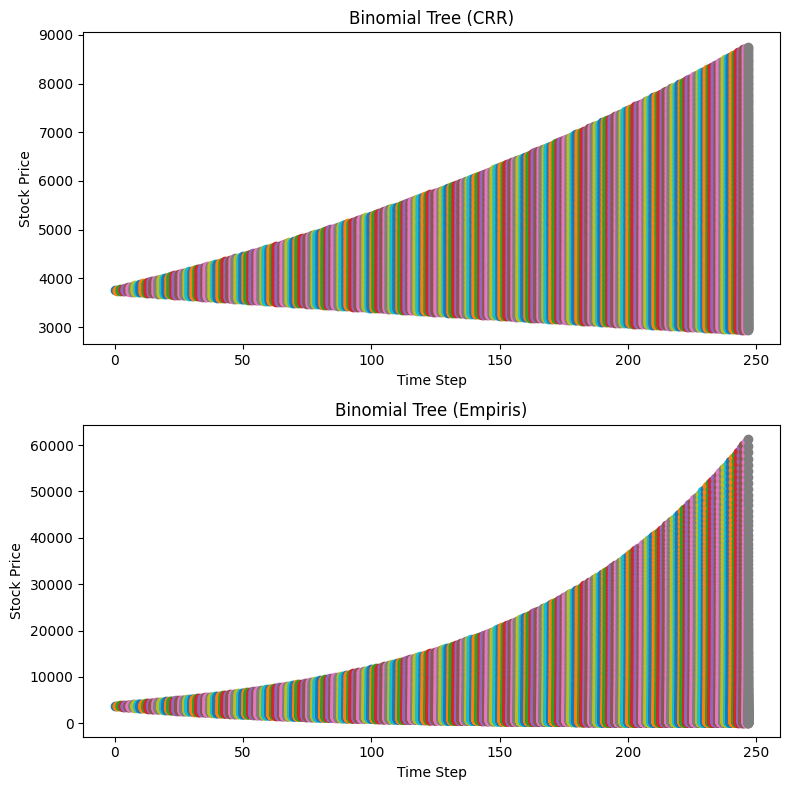

In [ ]:
#@title 5. Buatlah pohon Binomial harga saham berdasarkan parameter di atas.

fig, ax = plt.subplots(2, figsize=(8, 8))

# Plot Binomial Tree (CRR)
price_crr = np.zeros((N+1, N+1), float)
price_crr[0, N] = S0
ax[0].scatter(0, price_crr[0, N])
for i in range(1, N+1):  # time step
    for j in reversed(range(i+1)):  # jumlah kenaikan
        price_crr[j, i] = S0 * u_crr**(j) * d_crr**(i-j)
    ax[0].scatter([i for k in range(len(price_crr[0:i+1, i]))], price_crr[0:i+1, i])
ax[0].set_title("Binomial Tree (CRR)")
ax[0].set_xlabel("Time Step")
ax[0].set_ylabel("Stock Price")

# Plot Binomial Tree (Empiris)
price_empirical = np.zeros((N+1, N+1), float)
price_empirical[0, N] = S0
ax[1].scatter(0, price_empirical[0, N])
for i in range(1, N+1):  # time step
    for j in reversed(range(i+1)):  # jumlah kenaikan
        price_empirical[j, i] = S0 * u_empirical**(j) * d_empirical**(i-j)
    ax[1].scatter([i for k in range(len(price_empirical[0:i+1, i]))], price_empirical[0:i+1, i])
ax[1].set_title("Binomial Tree (Empiris)")
ax[1].set_xlabel("Time Step")
ax[1].set_ylabel("Stock Price")

plt.tight_layout()
plt.show()


# fig, ax = plt.subplots(figsize=(8, 4))

# # Plot Binomial Tree (Empiris)
# price_empirical = np.zeros((N+1, N+1), float)
# price_empirical[0, N] = S0
# ax.scatter(0, price_empirical[0, N], c='red', alpha=0.25, label='Empiris')
# for i in range(1, N+1):  # time step
#     for j in reversed(range(i+1)):  # jumlah kenaikan
#         price_empirical[j, i] = S0 * u_empirical**(j) * d_empirical**(i-j)
#     ax.scatter([i for k in range(len(price_empirical[0:i+1, i]))], price_empirical[0:i+1, i], c='red', alpha=0.25)

# # Plot Binomial Tree (CRR)
# price_crr = np.zeros((N+1, N+1), float)
# price_crr[0, N] = S0
# ax.scatter(0, price_crr[0, N], c='blue', alpha=0.25, label='CRR')
# for i in range(1, N+1):  # time step
#     for j in reversed(range(i+1)):  # jumlah kenaikan
#         price_crr[j, i] = S0 * u_crr**(j) * d_crr**(i-j)
#     ax.scatter([i for k in range(len(price_crr[0:i+1, i]))], price_crr[0:i+1, i], c='blue', alpha=0.25)

# ax.set_title("Binomial Tree Comparison")
# ax.set_xlabel("Time Step")
# ax.set_ylabel("Stock Price")
# ax.legend()

# plt.show()

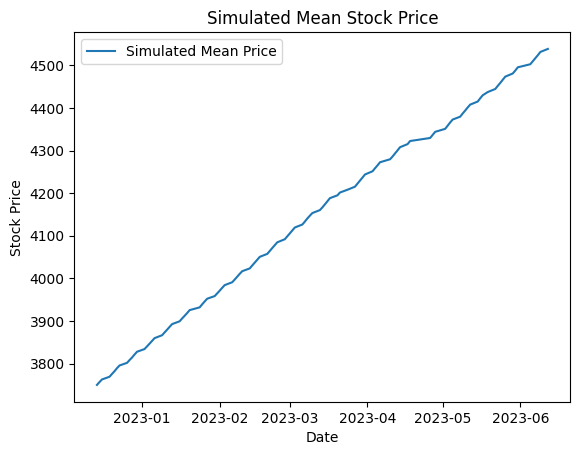

In [ ]:
#@title 6. Lakukan simulasi MC untuk mendapatkan barisan harga rata-rata saham: $\bar{S_1}, \bar{S_2}, \cdots, \bar{S_N}$ beserta selang kepercayaan 95%, dengan $N$ merupakan jumlah hari selama 6 bulan dari tanggal terakhir data historis.

cutoffDate_sim = end_date - pd.DateOffset(months=6)
data_6_months_sim = data[data.index >= cutoffDate_sim]  # Menggunakan 6 bulan terakhir data
N_sim = len(data_6_months_sim)
M = 1000  # Jumlah iterasi simulasi
simulation_results = []

for _ in range(M):
    simulated_prices = [S0]
    for i in range(1, N_sim):
        random_num = np.random.uniform()  # Menggunakan distribusi uniform sebagai acak
        if random_num < p_crr:
            price = simulated_prices[-1] * u_crr
        else:
            price = simulated_prices[-1] * d_crr
        simulated_prices.append(price)
    simulation_results.append(simulated_prices)

# for _ in range(n_simulations):
#     prices = [S0]

#     for i in range(N-1):
#         prev_price = prices[-1]
#         if np.random.uniform() < p_binomial:
#             price = prev_price * u
#         else:
#             price = prev_price * d
#         prices.append(price)

#     simulation_results.append(prices)

# Menghitung harga rata-rata dan selang kepercayaan 95%
mean_simulated_prices = np.mean(simulation_results, axis=0)
lower_bound = np.percentile(simulation_results, 2.5, axis=0)
upper_bound = np.percentile(simulation_results, 97.5, axis=0)
actual_prices = df['Close'].values[-N_sim:]

plt.plot(data_6_months_sim.index, mean_simulated_prices, label='Simulated Mean Price')
plt.title("Simulated Mean Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# print(N_sim)
# print(mean_prices)
# print(lower_bound)
# print(upper_bound)

In [ ]:
#@title 7. Bandingkan dengan harga saham aktual dengan menghitung selisihnya.

# # Visualisasi hasil simulasi Monte Carlo
# mean_prices = np.mean(simulation_results, axis=0)
# lower_bound = np.percentile(simulation_results, 2.5, axis=0)
# upper_bound = np.percentile(simulation_results, 97.5, axis=0)

# # Perbandingan harga saham aktual dan harga simulasi
# actual_prices = df['Close'].values[-N:]

# plt.figure(figsize=(12, 6))
# plt.plot(actual_prices, label="Harga Aktual")
# plt.plot(mean_prices, label="Harga Rata-rata Simulasi")
# plt.fill_between(range(N), lower_bound, upper_bound, alpha=0.3, label="Selang Kepercayaan 95%")
# plt.xlabel("Hari")
# plt.ylabel("Harga Saham")
# plt.title("Perbandingan Harga Saham Aktual dan Harga Simulasi")
# plt.legend()
# plt.show()

# # Error mutlak perbedaan harga
# price_diff = actual_prices - mean_prices


# # Menghitung harga aktual selama periode simulasi
# actual_prices = hist[-days_simulation:].values

# # Plot perbandingan harga saham simulasi dan aktual
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(actual_prices, label='Actual Prices')
# ax.plot(np.mean(simulated_prices, axis=0), label='Simulated Prices (Mean)')
# ax.set_title("Comparison of Actual and Simulated Stock Prices", fontsize=16, fontweight='bold')
# ax.set_ylabel("Price", fontsize=12)
# ax.set_xlabel("Day", fontsize=12)
# ax.legend()
# plt.show()

# # Menghitung selisih harga simulasi dengan harga aktual
# price_diff = simulated_prices - actual_prices.reshape(1, -1)

# # Menghitung error mutlak perbedaan harga
# abs_error = np.abs(price_diff)

In [ ]:
#@title 8. Plot perbandingan harga saham antar simulasi dan aktual berikut error mutlak perbedaan harganya, dan gambarkan distribusi selisihnya dalam boxplot dan histogram.

# plt.figure(figsize=(12, 4))
# plt.plot(np.abs(price_diff))
# plt.xlabel("Hari")
# plt.ylabel("Error Mutlak")
# plt.title("Error Mutlak Perbedaan Harga Saham Aktual dan Harga Simulasi")
# plt.show()

# # Distribusi selisih harga
# plt.figure(figsize=(8, 6))
# plt.boxplot(price_diff)
# plt.xlabel("Selisih Harga")
# plt.ylabel("Frekuensi")
# plt.title("Distribusi Selisih Harga Saham Aktual dan Harga Simulasi")
# plt.show()

# # Histogram selisih harga
# plt.figure(figsize=(8, 6))
# plt.hist(price_diff, bins=30)
# plt.xlabel("Selisih Harga")
# plt.ylabel("Frekuensi")
# plt.title("Histogram Selisih Harga Saham Aktual dan Harga Simulasi")
# plt.show()



# # Plot distribusi selisih harga dalam boxplot
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.boxplot(price_diff, notch=True, vert=False)
# ax.set_title("Distribution of Price Differences", fontsize=16, fontweight='bold')
# ax.set_ylabel("Simulated Days", fontsize=12)
# ax.set_xlabel("Price Difference", fontsize=12)
# plt.show()

# # Plot distribusi selisih harga dalam histogram
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.hist(price_diff.flatten(), bins=30, edgecolor='black')
# ax.set_title("Histogram of Price Differences", fontsize=16, fontweight='bold')
# ax.set_xlabel("Price Difference", fontsize=12)
# ax.set_ylabel("Frequency", fontsize=12)
# plt.show()



In [ ]:
#@title 9. Bandingkan pula hasil simulasi mana dari 2 cara berbeda (empiris & model CRR) penentuan parameter $u$, $d$, $p$ di atas yang lebih dekat dengan data aktual, berdasarkan nilai rata-rata error. (Pilihan nilai rata-rata error: MSE, **MAE**, MAPE).

# # Bandingkan hasil simulasi dari dua cara berbeda
# simulation_results_crr = np.array(simulation_results)[:, :N]
# error_empirical = np.abs(actual_prices - mean_prices).mean()
# error_crr = np.abs(actual_prices - simulation_results_crr.mean(axis=0)).mean()

# print("Rata-rata Error (Metode Empiris):", error_empirical)
# print("Rata-rata Error (Metode CRR):", error_crr)


# # Menghitung rata-rata error (MSE, MAE, MAPE)
# mse = np.mean(np.square(price_diff))
# mae = np.mean(abs_error)
# mape = np.mean(abs_error / actual_prices.reshape(1, -1)) * 100

# print('Mean Squared Error (MSE):', mse)
# print('Mean Absolute Error (MAE):', mae)
# print('Mean Absolute Percentage Error (MAPE):', mape)


Referensi:
1. https://colab.research.google.com/drive/1BXfbXI8fFjjDpIfORBkqIQSfHxvs2gsa?usp=sharing
2. https://towardsdatascience.com/create-a-stock-price-simulator-with-python-b08a184f197d